In [1]:
from neuron import h, gui
import numpy as np

In [93]:
def make_myelinated_axon(diameter, nseg=3, innode_len=500, ranvier_len=1, n_nodes=4, n_innode=3):
    tag = np.random.randint(0,9)
    axon = []
    
    for i in range(n_innode + n_nodes): 
        if i % 2 == 0: 
            r = h.Section(name='ranvier%d%d'%(tag,i))
            r(0.5).diam = diameter
            r.nseg = nseg
            #r.Ra = 123.
            r.L = ranvier_len
            r.insert('hh')
            if i > 0: 
                r.connect(axon[-1](1))
            axon.append(r)
            
        if i % 2 == 1: 
            m = h.Section(name='myelin%d%d'%(tag,i))
            m(0.5).diam = diameter
            m.nseg = nseg
            #m.Ra = 123.
            m.L = innode_len
            m.insert('pas')
            m.g_pas = 0.
            m.connect(axon[-1](1))
            axon.append(m)  

    return axon    

In [94]:
a1 = make_myelinated_axon(1)
print(a1)
for i in a1:
    h.psection(sec=i)
    


[ranvier60, myelin61, ranvier62, myelin63, ranvier64, myelin65, ranvier66]
ranvier60 { nseg=3  L=1  Ra=35.4
	/*location 0 attached to cell 2*/
	/* First segment only */
	insert capacitance { cm=1}
	insert morphology { diam=1}
	insert hh { gnabar_hh=0.12 gkbar_hh=0.036 gl_hh=0.0003 el_hh=-54.3}
	insert na_ion { ena=50}
	insert k_ion { ek=-77}
}
myelin61 { nseg=3  L=500  Ra=35.4
	ranvier60 connect myelin61 (0), 1
	/* First segment only */
	insert capacitance { cm=1}
	insert morphology { diam=1}
	insert pas { g_pas=0 e_pas=-70}
}
ranvier62 { nseg=3  L=1  Ra=35.4
	myelin61 connect ranvier62 (0), 1
	/* First segment only */
	insert capacitance { cm=1}
	insert morphology { diam=1}
	insert hh { gnabar_hh=0.12 gkbar_hh=0.036 gl_hh=0.0003 el_hh=-54.3}
	insert na_ion { ena=50}
	insert k_ion { ek=-77}
}
myelin63 { nseg=3  L=500  Ra=35.4
	ranvier62 connect myelin63 (0), 1
	/* First segment only */
	insert capacitance { cm=1}
	insert morphology { diam=1}
	insert pas { g_pas=0 e_pas=-70}
}
ranvier64

In [96]:
v_vec = [h.Vector() for i in range(7*3)]
t = h.Vector() 

loc = [0,0.5,1]
for i in range(len(v_vec)): 
    v_vec[i].record(a1[i//3](loc[i%3])._ref_v)
t.record(h._ref_t)

stim = h.IClamp(a1[0](0))
stim.delay = 50
stim.dur = 1
stim.amp = 0.5

h.tstop = 1500
h.run() 

0.0

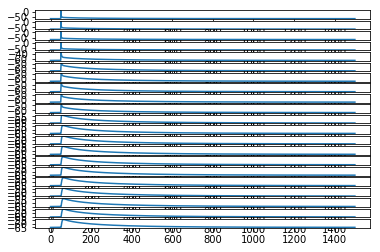

In [97]:
import matplotlib.pyplot as plt
for i in range(7*3): 
    plt.subplot(7*3,1,i+1)
    plt.plot(t, v_vec[i])
plt.show()
